##### Exploratory Data Analysis - 'user_logs.csv'

What we already know: 

##### user_logs.csv

Daily user logs describing listening behaviors of a user. Data collected until 2/28/2017.

- msno: user id
- date: format %Y%m%d
- num_25: # of songs played less than 25% of the song length
- num_50: # of songs played between 25% to 50% of the song length
- num_75: # of songs played between 50% to 75% of of the song length
- num_985: # of songs played between 75% to 98.5% of the song length
- num_100: # of songs played over 98.5% of the song length
- num_unq: # of unique songs played
- total_secs: total seconds played

##### user_logs_v2.csv

Same format as user_logs.csv, refreshed 11/06/2017, contains the user logs data until 3/31/2017.

In [1]:
# import libraries

import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('ggplot')

##### We understand that the size of this file is ~ 28.4 GB which requires us to analyze it iteratively!

In [2]:
# import the first 10 million rows

user_logs_df = pd.read_csv("user_logs.csv", chunksize = 10000000)

In [3]:
for chunk in user_logs_df:
    
    part_one = chunk
    
    break

In [4]:
# explore the part_one dataframe

print(part_one.columns)

part_one.head(25)

Index(['msno', 'date', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100',
       'num_unq', 'total_secs'],
      dtype='object')


,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,20150513,0,0,0,0,1,1,280.335
1,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,20150709,9,1,0,0,7,11,1658.948
2,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150105,3,3,0,0,68,36,17364.956
3,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150306,1,0,1,1,97,27,24667.317
4,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150501,3,0,0,0,38,38,9649.029
5,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150702,4,0,1,1,33,10,10021.520
6,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150830,3,1,0,0,4,7,1119.555
7,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20151107,1,0,0,0,4,5,938.022
8,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20160110,2,0,1,0,11,6,3004.068
9,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20160316,9,3,4,1,67,50,18257.661


In [5]:
# print the shape of the dataframe

part_one.shape

(10000000, 9)

We observe that there are 10 million observations in the first chunk of the user_logs.csv file with 9 features.

In [6]:
# get the info

part_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 9 columns):
msno          object
date          int64
num_25        int64
num_50        int64
num_75        int64
num_985       int64
num_100       int64
num_unq       int64
total_secs    float64
dtypes: float64(1), int64(7), object(1)
memory usage: 686.6+ MB


In [7]:
# let's figure out the date range for the first part

part_one['log_date'] = pd.to_datetime(part_one['date'], format = '%Y%m%d')

In [8]:
part_one['log_date'].min()

Timestamp('2015-01-01 00:00:00')

In [9]:
part_one['log_date'].max()

Timestamp('2017-02-28 00:00:00')

This suggests that the user_logs.csv file is not arrange by the day of the year, but rather it is arranged by users.

For instance, we see from the first 25 rows that the user 'yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=''s first log is on 2015-01-05 and his last login is on 2017-01-06.	

In [10]:
# let's find the user with the maximum number of entries

log_entries_by_user = part_one.groupby(['msno'])['msno'].count()

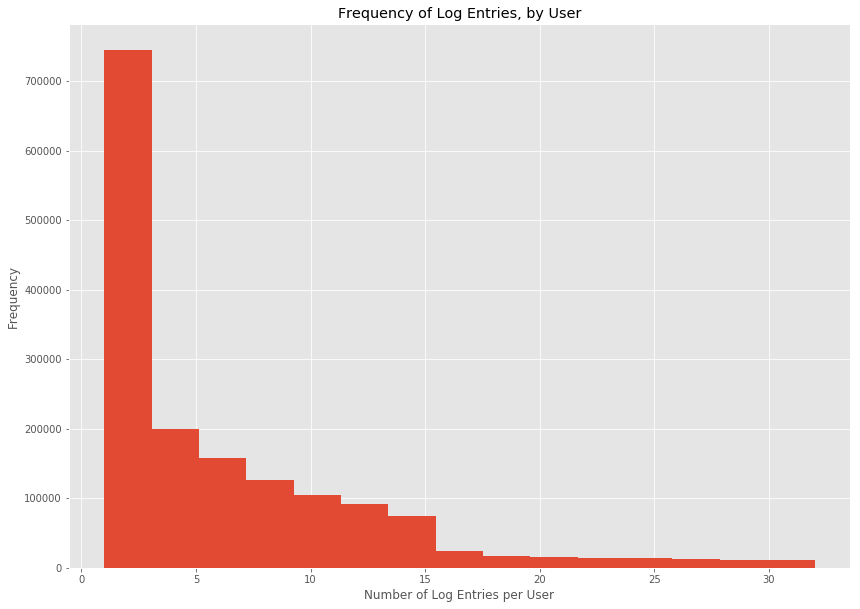

In [11]:
# plot the frequency of the log entries by user

plt.figure(figsize = (14, 10))
plt.hist(log_entries_by_user, bins = 15)
plt.title('Frequency of Log Entries, by User')
plt.xlabel('Number of Log Entries per User')
plt.ylabel('Frequency')
plt.show()

We observe that ~ 750,000 users logged into the service only ~ 3 times in their subscription.

This indicates that most of the users who signed up for the service didn't use the service for more than ~ 3 days.

We also observe that ~ 100,000 users logged into the service for close to ~ 15 instances (days).

While we also see that we don't have any user with more than 32 entries in the first part of the dataset.

In [12]:
max_user_one = part_one[part_one['msno'] == log_entries_by_user.idxmax()].sort_values('log_date')

In [13]:
max_user_one

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,log_date
7347602,++gBw2LuXMIbXXlYAEJHrxo31ZIBO2HT0EMm7j+ABxA=,20150110,4,1,1,10,35,44,11621.808,2015-01-10
8090825,++gBw2LuXMIbXXlYAEJHrxo31ZIBO2HT0EMm7j+ABxA=,20150111,9,2,1,1,61,72,16502.716,2015-01-11
7347603,++gBw2LuXMIbXXlYAEJHrxo31ZIBO2HT0EMm7j+ABxA=,20150301,6,2,0,9,101,99,27068.463,2015-03-01
8090826,++gBw2LuXMIbXXlYAEJHrxo31ZIBO2HT0EMm7j+ABxA=,20150302,2,0,1,2,14,13,4187.704,2015-03-02
7347604,++gBw2LuXMIbXXlYAEJHrxo31ZIBO2HT0EMm7j+ABxA=,20150420,4,3,0,8,51,64,14832.404,2015-04-20
8090827,++gBw2LuXMIbXXlYAEJHrxo31ZIBO2HT0EMm7j+ABxA=,20150421,3,2,0,0,36,39,9226.120,2015-04-21
7347605,++gBw2LuXMIbXXlYAEJHrxo31ZIBO2HT0EMm7j+ABxA=,20150610,4,1,1,1,9,14,2765.848,2015-06-10
8090828,++gBw2LuXMIbXXlYAEJHrxo31ZIBO2HT0EMm7j+ABxA=,20150611,0,1,0,0,11,11,2631.849,2015-06-11
7347606,++gBw2LuXMIbXXlYAEJHrxo31ZIBO2HT0EMm7j+ABxA=,20150730,7,3,0,0,39,47,9632.424,2015-07-30
8090829,++gBw2LuXMIbXXlYAEJHrxo31ZIBO2HT0EMm7j+ABxA=,20150731,3,0,0,1,48,31,12542.782,2015-07-31


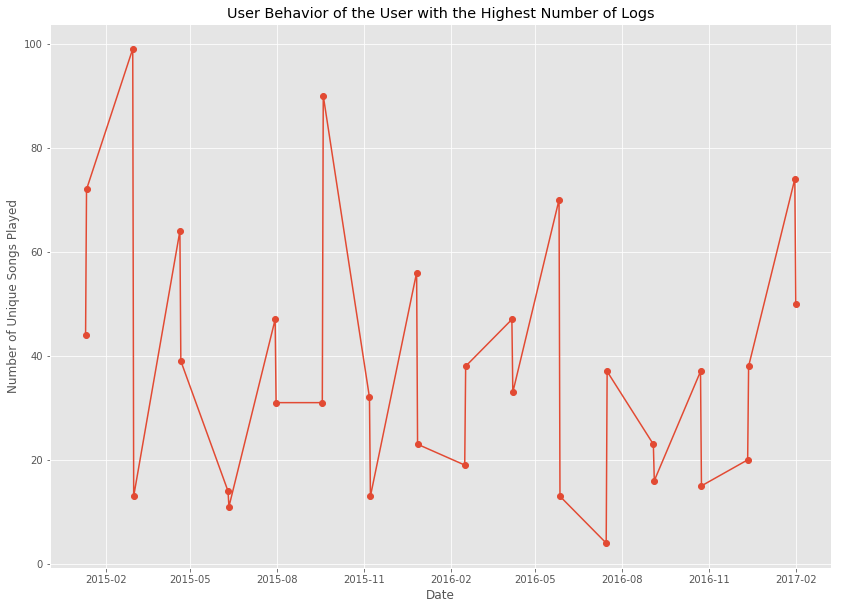

In [14]:
plt.figure(figsize = (14, 10))
plt.plot(max_user_one['log_date'], max_user_one['num_unq'], marker = 'o')
plt.title('User Behavior of the User with the Highest Number of Logs')
plt.xlabel('Date')
plt.ylabel('Number of Unique Songs Played')
plt.show()

This suggests that the user with the highest number of log entries usually logs in for two consecutive days after every ~ 1.5 months.

It may also suggest that the user usually plays for two consecutive days at a stretch whenever he/she logs in, where two log entries might suggest a single instance of user login.

In [15]:
print("Highest Number of Log Entries for any User: " + "\n")

print(log_entries_by_user.max())

print("\n" + "Number of Users with the Highest Number of Log Entries (32): " + "\n")

print(sum(log_entries_by_user == log_entries_by_user.max()))

Highest Number of Log Entries for any User: 

32

Number of Users with the Highest Number of Log Entries (32): 

1985


In [16]:
# let's visualize the behavior of the top 5 users by log entry

log_entries_by_user[log_entries_by_user == log_entries_by_user.max()].head(10)

msno
++gBw2LuXMIbXXlYAEJHrxo31ZIBO2HT0EMm7j+ABxA=    32
+0wVDAMIsVvdiJ68FFYQ65MUpay2kGiLXBBkW9aFuGw=    32
+1aPP+m2QJVUEwmj++DwTR+u6fIjsGcby6DsMtCh5KA=    32
+4MGnzwsr7SwPzTGL+3lFWrK2VUloUgqy8Xp8lEt71U=    32
+5CqE+CudZpsKC9maQ3aIiQpDk2zqK6Qf3WXJK04YhA=    32
+6zmpy/UXgS+AdTIZKDFeQhh6N9v0JyG8OwEFcCl87c=    32
+8IsxrkugLHC+e8VPzxftsCHtYHSe60M+SETTctPZ6k=    32
+9Zz3PUTVD15VP4KzmzoCOn86kEx0QwGCFbS7JvhYCk=    32
+C/8liqoMJ4BhXObIhOCS45YqU0MSxZW2Tml0w73ZBQ=    32
+C4PNGXOow/n2lcdYKV7m62idfM8qOpEOO9nr7YAtKc=    32
Name: msno, dtype: int64

We observe ~ same pattern as the first user we visualized for all the 10 users with the highest number of logs.

All of them have entries for two consecutive days with such instances happening every ~ 1.5 months.

This could either be a coincident or the prevalent listening pattern of the user base (it will require a deeper investigation).

In [17]:
# summary statistics of the data set

part_one_stats = part_one.describe()

In [18]:
part_one_stats

,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,2.015739e+07,6.506807e+00,1.640660e+00,1.016426e+00,1.128576e+00,3.071366e+01,3.008059e+01,-1.458215e+12
std,6.182038e+03,1.453850e+01,4.313471e+00,2.178233e+00,2.902093e+00,4.230497e+01,3.377304e+01,1.162566e+14
min,2.015010e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-9.223372e+15
25%,2.015082e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,8.000000e+00,1.891447e+03
50%,2.016031e+07,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01,1.900000e+01,4.627348e+03
75%,2.016091e+07,7.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,3.800000e+01,4.000000e+01,1.026125e+04
max,2.017023e+07,7.112000e+03,8.780000e+02,4.910000e+02,1.515000e+03,1.946200e+04,2.767000e+03,9.223372e+15


As per the summary statistics we see that it is possible for incorrect values in the dataset.

For example, we observe that the maximum value for the 'total_secs' is 9.223e+15 which is unreasonable and we'll have to clean such inaccuracies.

In [19]:
part_one[part_one['total_secs'] == part_one['total_secs'].max()]

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,log_date
2325827,npeskfZLCgrlSlaT/98E/dstIX4EGouTDm8iSZwxi20=,20150928,0,0,0,0,1,1,9.223372e+15,2015-09-28
6455367,wOuzgwMMccITDgAMD0obhNtF8gF4Fz8C57jw4Tgg/Zw=,20150609,0,0,0,0,1,1,9.223372e+15,2015-06-09
6511943,FaFE+PQODYJNMd4E+42a81akHnpBSTs5hyL26wQupT8=,20150529,0,0,0,0,1,1,9.223372e+15,2015-05-29
7363149,Fra8SJdpISl291dZpiE+b5x61/yUOSttr/mKBKmceoc=,20150604,0,0,0,0,1,1,9.223372e+15,2015-06-04


In [20]:
# visualize the distribution of features

# cleaning the part_one dataframe of incorrect values of 'total_secs'

part_one_total_secs = part_one[np.logical_and(part_one['total_secs'] >= 0, part_one['total_secs'] <= 86400)]['total_secs']

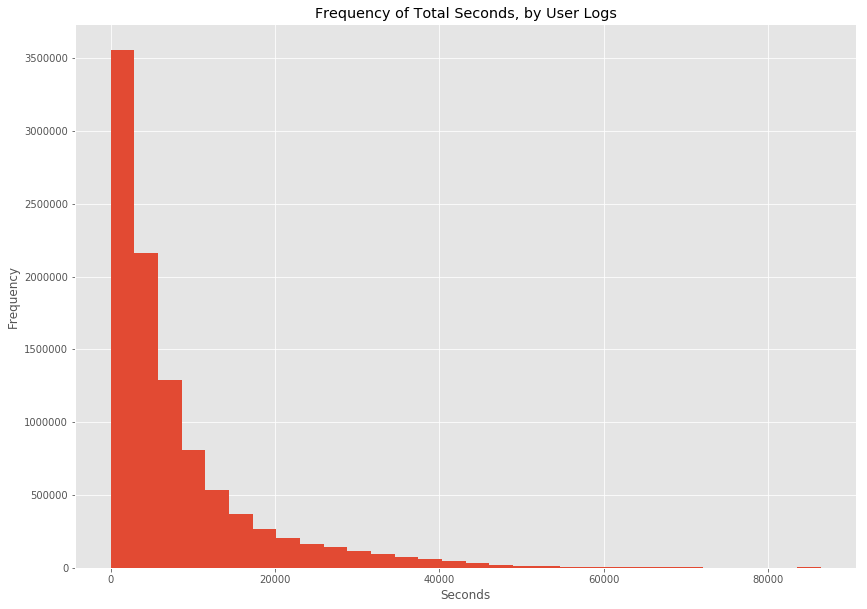

In [21]:
plt.figure(figsize = (14, 10))
plt.hist(part_one_total_secs, bins = 30)
plt.title('Frequency of Total Seconds, by User Logs')
plt.xlabel('Seconds')
plt.ylabel('Frequency')
plt.show()

In [22]:
# cleaning the part_one dataframe of incorrect values of 'num_100'

part_one_num_100 = part_one[np.logical_and(part_one['num_100'] <= 300, part_one['num_100'] >= 0)]['num_100']

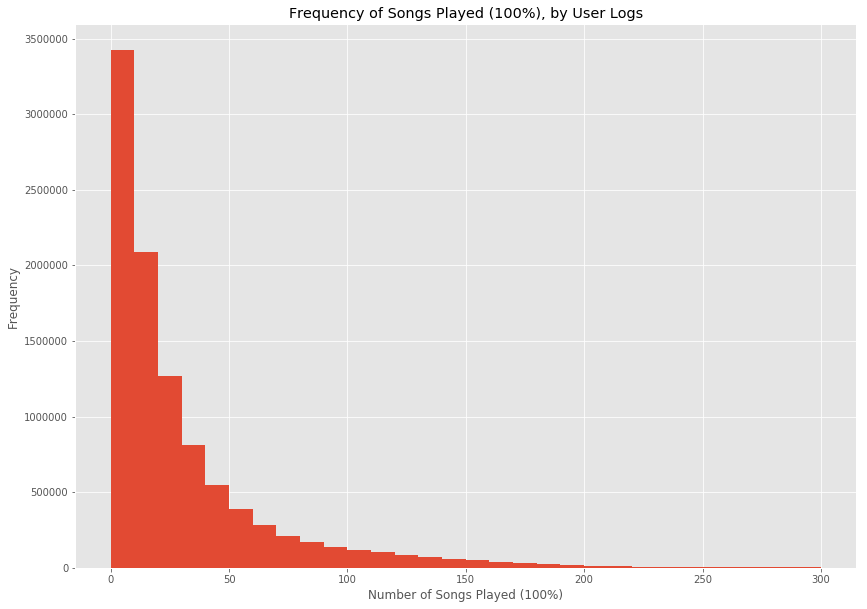

In [23]:
plt.figure(figsize = (14, 10))
plt.hist(part_one_num_100, bins = 30)
plt.title('Frequency of Songs Played (100%), by User Logs')
plt.xlabel('Number of Songs Played (100%)')
plt.ylabel('Frequency')
plt.show()

In [24]:
# cleaning the part_one dataframe of incorrect values of 'num_985'

part_one_num_985 = part_one[np.logical_and(part_one['num_985'] <= 50, part_one['num_985'] >= 0)]['num_985']

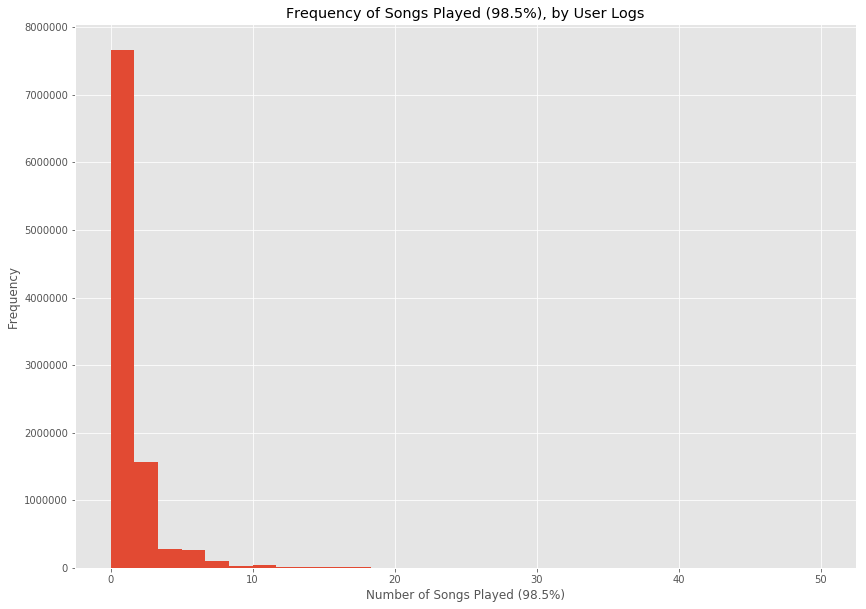

In [25]:
plt.figure(figsize = (14, 10))
plt.hist(part_one_num_985, bins = 30)
plt.title('Frequency of Songs Played (98.5%), by User Logs')
plt.xlabel('Number of Songs Played (98.5%)')
plt.ylabel('Frequency')
plt.show()

In [26]:
# cleaning the part_one dataframe of incorrect values of 'num_75'

part_one_num_75 = part_one[np.logical_and(part_one['num_75'] <= 50, part_one['num_75'] >= 0)]['num_75']

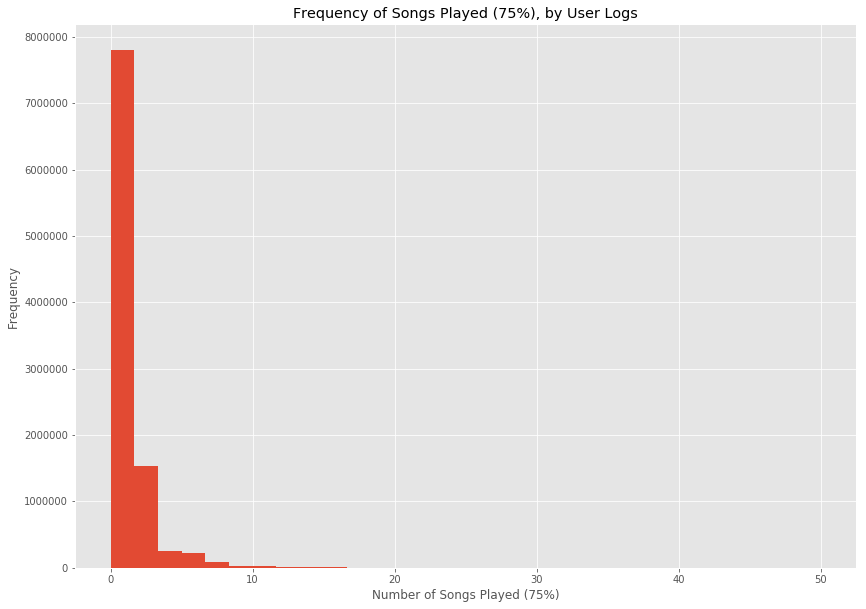

In [27]:
plt.figure(figsize = (14, 10))
plt.hist(part_one_num_75, bins = 30)
plt.title('Frequency of Songs Played (75%), by User Logs')
plt.xlabel('Number of Songs Played (75%)')
plt.ylabel('Frequency')
plt.show()

In [28]:
# cleaning the part_one dataframe of incorrect values of 'num_50'

part_one_num_50 = part_one[np.logical_and(part_one['num_50'] <= 50, part_one['num_50'] >= 0)]['num_50']

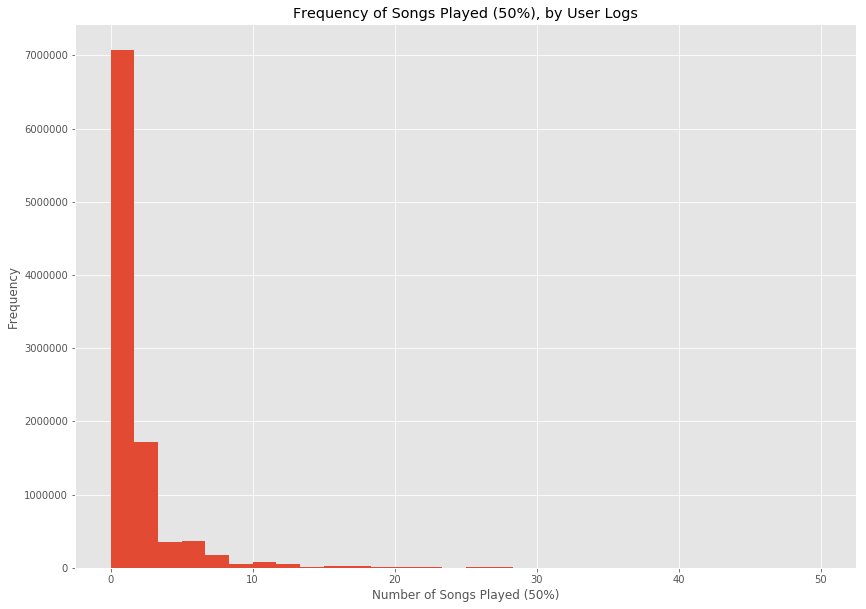

In [29]:
plt.figure(figsize = (14, 10))
plt.hist(part_one_num_50, bins = 30)
plt.title('Frequency of Songs Played (50%), by User Logs')
plt.xlabel('Number of Songs Played (50%)')
plt.ylabel('Frequency')
plt.show()

In [30]:
# cleaning the part_one dataframe of incorrect values of 'num_25'

part_one_num_25 = part_one[np.logical_and(part_one['num_25'] <= 50, part_one['num_25'] >= 0)]['num_25']

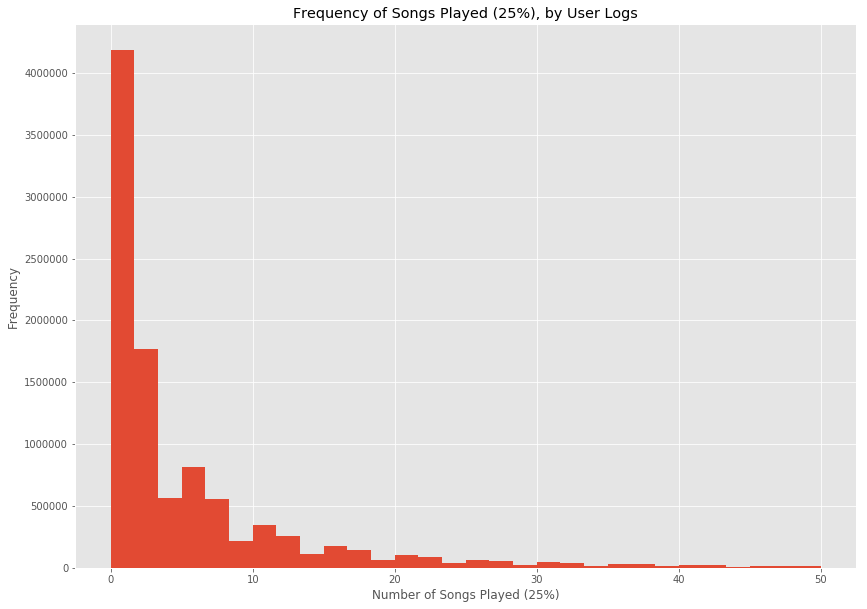

In [31]:
plt.figure(figsize = (14, 10))
plt.hist(part_one_num_25, bins = 30)
plt.title('Frequency of Songs Played (25%), by User Logs')
plt.xlabel('Number of Songs Played (25%)')
plt.ylabel('Frequency')
plt.show()

In [32]:
# cleaning the part_one dataframe of incorrect values of 'num_unq'

part_one_num_unq = part_one[np.logical_and(part_one['num_unq'] <= 300, part_one['num_unq'] >= 0)]['num_unq']

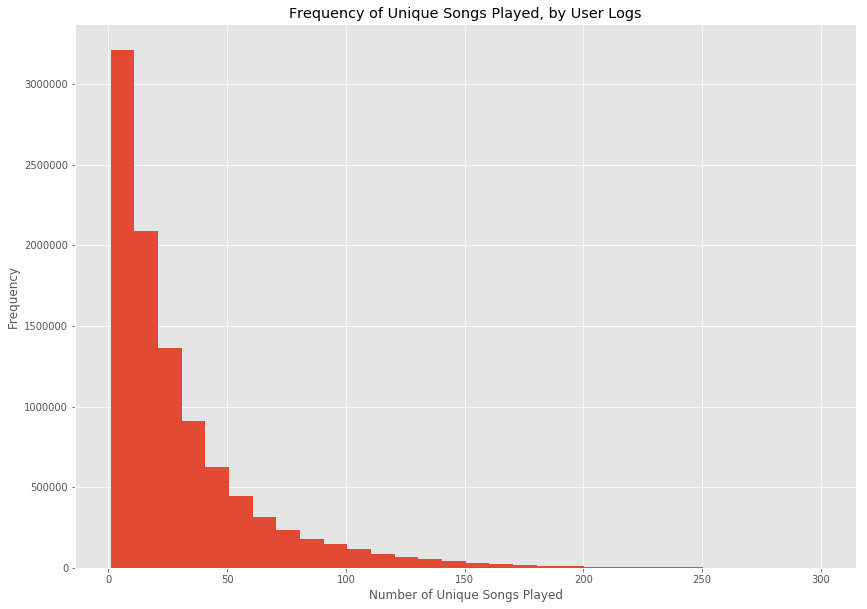

In [33]:
plt.figure(figsize = (14, 10))
plt.hist(part_one_num_unq, bins = 30)
plt.title('Frequency of Unique Songs Played, by User Logs')
plt.xlabel('Number of Unique Songs Played')
plt.ylabel('Frequency')
plt.show()

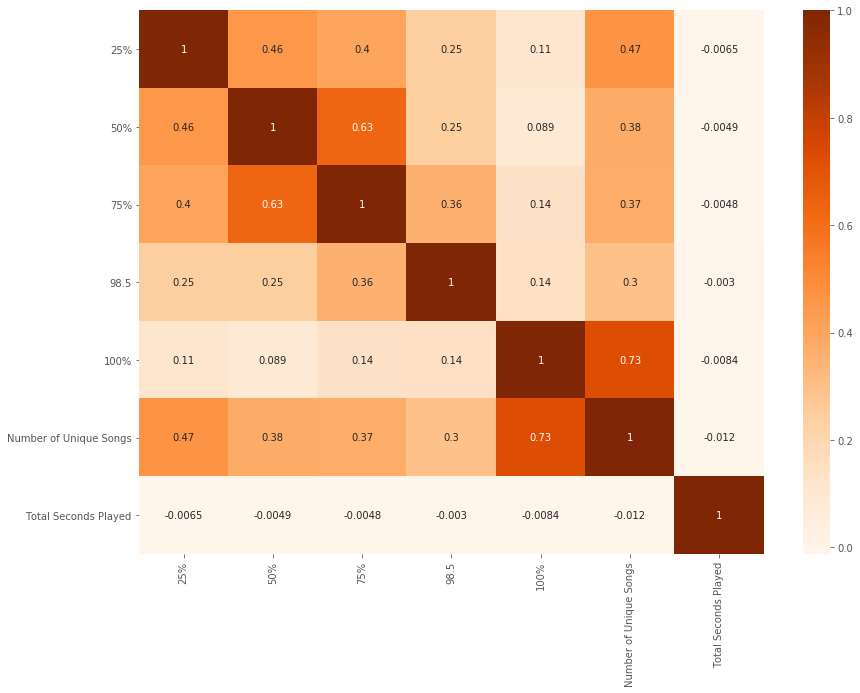

In [34]:
# calculate the correlation matrix
correlation_matrix = part_one[['num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs', 'log_date']].corr()

# plot the correlation matrix
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, cmap = 'Oranges', annot = True, xticklabels = ['25%', '50%', '75%', '98.5', '100%', 
                                                                               'Number of Unique Songs', 
                                                                               'Total Seconds Played'], 
           yticklabels = ['25%', '50%', '75%', '98.5', '100%', 'Number of Unique Songs', 'Total Seconds Played'])
plt.show()